<a href="https://colab.research.google.com/github/jcohenadad/mri-relaxation/blob/main/t2_relaxation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T2 relaxation and contrast in MRI

This notebook illustrates how to optimize contrat between two structures on a T2-weighted sequence. Here, we assume perfect T1 relaxation.

T2 are defined according to [Lu et al. JMRI 2005](https://onlinelibrary.wiley.com/doi/10.1002/jmri.20356):
- T2[WM] = 75 ms
- T2[GM] = 83 ms

In [7]:
import matplotlib.pyplot as plt
import numpy as np

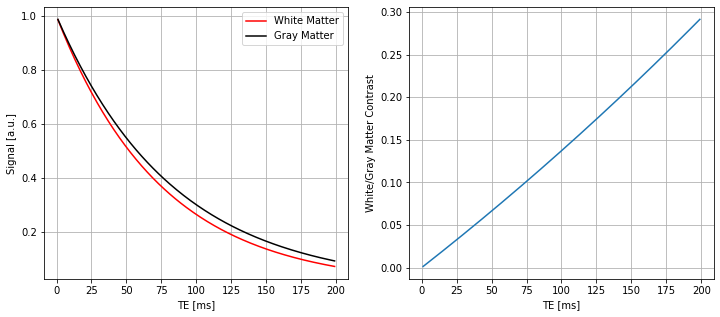

In [20]:
# We define T2 values
T2_WM = 0.075
T2_GM = 0.083

def Mxy(TE, T2):
  # here we can set an arbitrary value for M0 because it is cancelled out when
  # computing the contrast
  M0 = 1
  return M0 * np.exp(-TE/T2)

# Define a range of TE
TE = np.arange(0.001, 0.2, 0.001)

contrast = np.abs((Mxy(TE, T2_WM) - Mxy(TE, T2_GM)) / Mxy(TE, T2_WM))

# Plot signal in WM an GM
plt.rcParams['figure.figsize'] = [12, 5]
plt.subplot(1, 2, 1)
plt.plot(TE*1000, Mxy(TE, T2_WM), 'r')
plt.plot(TE*1000, Mxy(TE, T2_GM), 'k')
plt.xlabel("TE [ms]")
plt.ylabel("Signal [a.u.]")
plt.legend(['White Matter', 'Gray Matter'])
plt.grid()

# Plot contrast
plt.subplot(1, 2, 2)
plt.plot(TE*1000, contrast)
plt.xlabel("TE [ms]")
plt.ylabel("White/Gray Matter Contrast")
plt.grid()


We observe that the contrast increases with the TE. However, realistically, we cannot have a TE that is *too long* because it will reach unacceptable  acquisition time. 